# **2. Machine Learning for Regression**

In [1]:
import numpy as np
import pandas as pd

## **2.2 Data Prerparation**

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [4]:
!wget $data

--2024-09-27 12:06:15--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.08s   

2024-09-27 12:06:16 (18.4 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
# We can see that the column names are inconsistent.
# 1. Some columns start with uppercase and some start with lowercase.
# 2. Some column names have space and some have underscore.
# To make all the column names consistent, we can make them lower case and replace the spaces with underscores (_)
df.columns=df.columns.str.lower().str.replace(' ','_')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
# Similary we can see the Row values are inconsistent.
# Some rows are in uppercase, some are in lowercase, etc. We only need to format the String cells.
df.dtypes # Getting the values type for each column.

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
#Selecting only columns with 'object' type, i.e. String type
# Each column is a Series with an index. Accessing the index for column name and converting it to a list
string_cols= list(df.dtypes[df.dtypes=='object'].index)
string_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
# To make all the rows consistent, we can make them lower case and replace the spaces with underscores (_)
for col in string_cols:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [10]:
df.head() # Row values are cleaned up and properly formatted

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## **2.3 Exploratory Data Analysis**

In [11]:
for col in df.columns:
    print(f"Column: '{col}'")
    print(f"The first 5 uinique values in column '{col}': \n {df[col].unique()[:5]}")
    print(f"Total unique values in column '{col}': {df[col].nunique()}")
    print()

Column: 'make'
The first 5 uinique values in column 'make': 
 ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Total unique values in column 'make': 48

Column: 'model'
The first 5 uinique values in column 'model': 
 ['1_series_m' '1_series' '100' '124_spider' '190-class']
Total unique values in column 'model': 914

Column: 'year'
The first 5 uinique values in column 'year': 
 [2011 2012 2013 1992 1993]
Total unique values in column 'year': 28

Column: 'engine_fuel_type'
The first 5 uinique values in column 'engine_fuel_type': 
 ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Total unique values in column 'engine_fuel_type': 10

Column: 'engine_hp'
The first 5 uinique values in column 'engine_hp': 
 [335. 300. 230. 320. 172.]
Total unique values in column 'engine_hp': 356

Column: 'engine_cylinders'
The first 5 uinique values in column 'engine_cylinders': 
 [ 6.  4.  5.  8. 12.]
Total unique values in column 'engi

### Distribution of price
- Visualizing the price column

In [12]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
%matplotlib --list

Available matplotlib backends: ['agg', 'auto', 'cairo', 'gtk3', 'gtk3agg', 'gtk3cairo', 'gtk4', 'gtk4agg', 'gtk4cairo', 'inline', 'macosx', 'nbagg', 'notebook', 'osx', 'pdf', 'pgf', 'ps', 'qt', 'qt5', 'qt5agg', 'qt5cairo', 'qt6', 'qtagg', 'qtcairo', 'svg', 'template', 'tk', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wx', 'wxagg', 'wxcairo']


Text(0.5, 1.0, 'Distribution of prices')

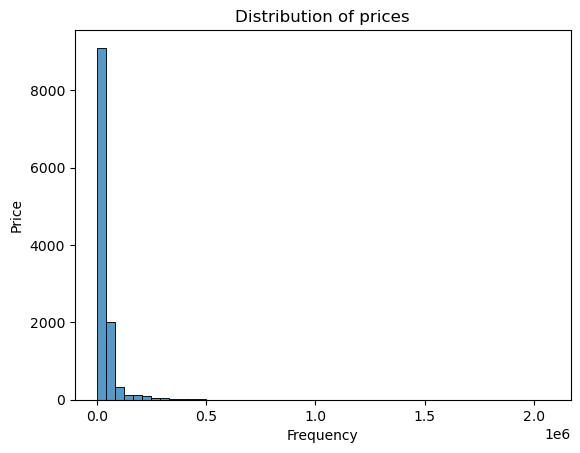

In [17]:
sns.histplot(df.msrp, bins=50)
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.title("Distribution of prices")
# plt.show()

Text(0.5, 1.0, 'Distribution of prices')

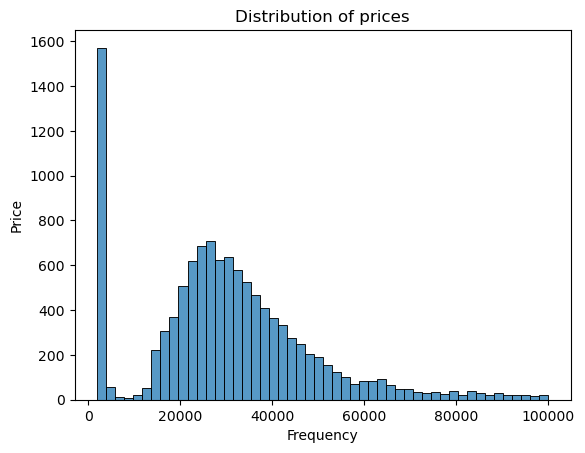

In [18]:
sns.histplot(df.msrp[df.msrp<100000], bins=50)
plt.xlabel("Frequency")
plt.ylabel("Price")
plt.title("Distribution of prices")
# plt.show()

- The above distribution is a long tail distribution. It has it's advantages and disadvantages - https://portable.io/learn/long-tail-data
- To get rid of the long tail distribution plotted above, we transform our data into logarithmic values.

In [21]:
np.log([1,10,1000,10000])

array([0.        , 2.30258509, 6.90775528, 9.21034037])

In [24]:
np.log([0+1,1+1,10+1,1000+1,10000+1]) #To account for 0 as log(0) is undefined

array([0.        , 0.69314718, 2.39789527, 6.90875478, 9.21044037])

- If we have zeros (0's) in our data so the model will be not that much accurate hence here we use **'np.log1p'** and it turns zeros value to x+1 then no values in the data will be zero.
- We shoulf be careful while inverting this as we will need to adjust the exponent too. Numpy has a function for that as well, as follows- **'np.exp1m'**

In [27]:
np.log1p([0,1,10,1000,10000])

array([0.        , 0.69314718, 2.39789527, 6.90875478, 9.21044037])

In [29]:
np.expm1([0.        , 0.69314718, 2.39789527, 6.90875478, 9.21044037])

array([0.00000000e+00, 9.99999999e-01, 9.99999997e+00, 1.00000000e+03,
       1.00000000e+04])

Text(0.5, 1.0, 'Distribution of prices after log tranformation')

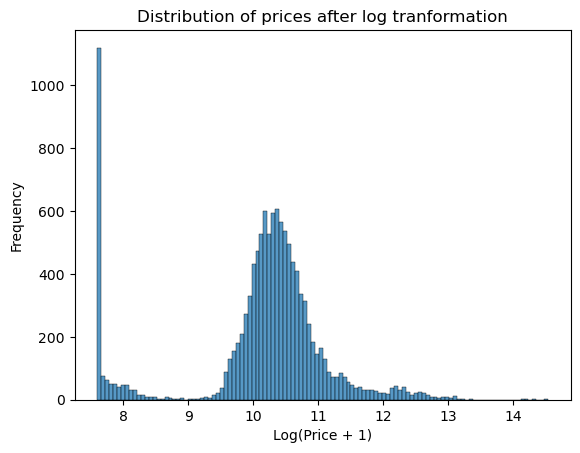

In [32]:
price_logs= np.log1p(df.msrp)
sns.histplot(price_logs)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

The above distribution with a bell shaped plot is called a normal distribution.

### Missing values

In [39]:
# Total count of missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [40]:
# Total count of available values
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64